In [1]:
from HTML import config as Config
from HTML.dataset import *
from HTML.config import ratio, nominal, ordinal, meaningless
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_train = pd.read_csv(Config.train_path)
x_train.head()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03


In [3]:
x_train['revenue'] = x_train['adr'] * np.sum(x_train[['stays_in_weekend_nights', 'stays_in_week_nights']], axis=1) * (1-x_train['is_canceled'])

In [4]:
x_train = add_arrival_date(x_train)

In [5]:
dummies = x_train[ratio+['revenue', 'arrival_date']]

In [6]:
x_train_processed = dummies.groupby('arrival_date').sum()

In [7]:
y_train = pd.read_csv(Config.train_label_path)
train = x_train_processed.merge(y_train, left_index=True, right_on='arrival_date')

In [8]:
train.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'revenue', 'arrival_date', 'label'],
      dtype='object')

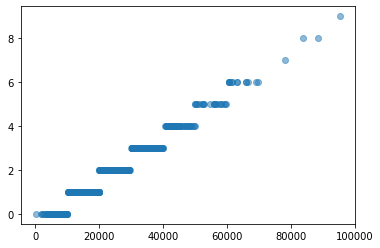

In [9]:
plt.scatter(train['revenue'], train['label'], alpha=.5)
plt.show()

In [13]:
train[['revenue', 'label']].groupby('label').describe()

revenue                                                         \
        count          mean          std           min           25%   
label                                                                  
0.0      94.0   6599.840662  2101.311996    183.356304   5016.099879   
1.0     152.0  15209.175317  2875.533310  10136.212972  12775.272954   
2.0     186.0  24299.932255  2869.282213  20007.362398  21805.741892   
3.0     124.0  34761.219116  2806.943146  30033.421662  32703.999657   
4.0      46.0  44372.545586  2676.937531  40675.172974  41987.779054   
5.0      21.0  54744.150719  3357.884296  50009.794592  52004.524058   
6.0      13.0  63745.125775  3341.427420  60518.613720  60554.665157   
7.0       1.0  78092.052308          NaN  78092.052308  78092.052308   
8.0       2.0  86139.218896  3368.771993  83757.137375  84948.178135   
9.0       1.0  95364.356693          NaN  95364.356693  95364.356693   

                                                 
                50%           75%           max  
label                                            
0.0     6989.024922   8185.895711   9887.119495  
1.0    15264.164604  17739.745688  19909.567136  
2.0    23946.328451  26895.379344  29760.288189  
3.0    34612.227828  37015.566263  39984.693879  
4.0    43765.271381  46453.608244  49934.008797  
5.0    55765.124591  57467.688304  59790.771360  
6.0    63085.079256  65968.695126  69668.522782  
7.0    78092.052308  78092.052308  78092.052308  
8.0    86139.218896  87330.259656  88521.300416  
9.0    95364.356693  95364.356693  95364.356693